In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the data
# data = pd.read_csv("/home/jakejoseph/Desktop/Joseph_Code/MVI_0288DLC_resnet50_RhodesInRigWithMarksAug18shuffle1_300000.csv", skiprows=3, header=None)
#Data from muscle fatigue test
data = pd.read_csv("/home/jakejoseph/Desktop/FES_V1-Joseph-2023-10-16/videos/MVI_0401DLC_resnet50_FES_V1Oct16shuffle1_38000.csv", skiprows=3, header=None)

FileNotFoundError: [Errno 2] No such file or directory: '/home/jakejoseph/Desktop/FES_V1-Joseph-2023-10-16/videos/MVI_0401DLC_resnet50_FES_V1Oct16shuffle1_38000.csv'

In [ ]:
#Initialize variables
stimCmds  = [0, 8, 16, 24, 31, 39, 43, 47, 51, 55, 59, 67, 75, 82, 90]
stimTimes = [21, 28, 35, 41, 57, 64, 75, 81, 88, 94, 101 ,109 ,116, 124, 133, 140]
useFramesMove = [670, 889, 1073, 1246, 1725, 1944, 2275, 2470, 2665, 2855, 3072, 3304, 3517, 3745, 4036] #I think these are hand selected frames by matt for when the stim is happening?
label1 = ["Forearm", "Wrist", "Hand", "MCP", "PIP", "DIP"]
label2 = ["x", "y", "likelihood"]
videoHeight = 720
fps = 29.97
threshold = 0.75
window = 30
#flip y pixels
# data.iloc[:,2::3] = videoHeight - data.iloc[:,2::3]  #not used

In [ ]:
#moving average
for i in range(1, len(data.columns),3):
    x = data.columns[i]
    y = data.columns[i+1]

    x_ma = data[x].rolling(window=window, min_periods=1).mean()
    y_ma = data[y].rolling(window=window, min_periods=1).mean()

    data[x] = x_ma
    data[y] = y_ma
    
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,832.825256,50.940067,0.999993,839.106812,186.029739,0.999990,734.853271,259.482483,0.999994,627.515198,308.784790,0.999998,566.510864,317.680817,0.999979,545.136841,275.788879,0.999999
1,1,832.879150,51.144541,0.999994,839.057739,185.929146,0.999989,734.616913,259.605377,0.999991,627.420044,308.525192,0.999998,566.580139,317.209030,0.999973,544.914215,275.822372,0.999999
2,2,832.695414,51.199403,0.999990,838.969747,185.893280,0.999991,734.451864,259.400930,0.999989,627.117676,308.218689,0.999997,566.569275,316.942851,0.999981,544.728149,275.710775,0.999999
3,3,832.513535,51.212071,0.999991,838.647446,185.778862,0.999991,734.273453,259.265854,0.999986,626.742142,308.009583,0.999996,566.339920,316.764000,0.999984,544.415604,275.442566,0.999997
4,4,832.350317,51.170481,0.999989,838.502795,185.684079,0.999989,734.080066,259.285858,0.999987,626.507239,307.861816,0.999996,566.099878,316.648267,0.999985,544.181616,275.192041,0.999996


In [ ]:
#low pass filter test

from scipy.signal import butter, filtfilt
import pandas as pd

# Butterworth Low Pass Filter
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Parameters
cutoff = 2  # increase if the smoothing is too aggressive
fs = 30  
order = 4  # try 4-6 and see what happens

# Apply filter to each relevant column
for i in range(0, len(df.columns), 3):
    x_col = df.columns[i]  # X coordinate column
    y_col = df.columns[i + 1]  # Y coordinate column

    df[x_col] = butter_lowpass_filter(df[x_col], cutoff, fs, order)
    df[y_col] = butter_lowpass_filter(df[y_col], cutoff, fs, order)


ValueError: The length of the input vector x must be greater than padlen, which is 15.

In [ ]:
def interpolate(df, x, y, likelihood):
    for i in range(1, len(df)):
        if df.iloc[i, likelihood] < threshold:
            df.iloc[i, x] = df.iloc[i-1, x]
            df.iloc[i, y] = df.iloc[i-1, y]

threshold = 0.75
for i in range(1,len(data.columns),3):
    likelihood = i + 2  
    x_col = i  
    y_col = i + 1  
    interpolate(data, x_col, y_col, likelihood)
data.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,832.825256,50.940067,0.999993,839.106812,186.029739,0.999990,734.853271,259.482483,0.999994,627.515198,308.784790,0.999998,566.510864,317.680817,0.999979,545.136841,275.788879,0.999999
1,1,832.933044,51.349014,0.999994,839.008667,185.828552,0.999989,734.380554,259.728271,0.999991,627.324890,308.265594,0.999998,566.649414,316.737244,0.999973,544.691589,275.855865,0.999999
2,2,832.327942,51.309128,0.999990,838.793762,185.821548,0.999991,734.121765,258.992035,0.999989,626.512939,307.605682,0.999997,566.547546,316.410492,0.999981,544.356018,275.487579,0.999999
3,3,831.967896,51.250076,0.999991,837.680542,185.435608,0.999991,733.738220,258.860626,0.999986,625.615540,307.382263,0.999996,565.651855,316.227448,0.999984,543.477966,274.637939,0.999997
4,4,831.697449,51.004120,0.999989,837.924194,185.304947,0.999989,733.306519,259.365875,0.999987,625.567627,307.270752,0.999996,565.139709,316.185333,0.999985,543.245667,274.189941,0.999996


In [ ]:
def calculate_angle(p1,p2, p3):
    #Calculate the angle at p2
    #Calculate the vectors
    v1 = np.array(p1) - np.array(p2)
    v2 = np.array(p3) - np.array(p2)
    #Calculate the angle
    angle = np.arccos(np.dot(v1,v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    #Convert to degrees
    angle = np.degrees(angle)
    return angle

calculate_angle((1,0),(0,0),(0.5,0.5)) #output should be 45 degrees

45.00000000000001

In [ ]:
wrist_likelihood = (data.iloc[:][data.columns[3]] + data.iloc[:][data.columns[6]] + data.iloc[:][data.columns[12]])/3
mcp_likelihood = (data.iloc[:][data.columns[12]] + data.iloc[:][data.columns[15]] + data.iloc[:][data.columns[6]])/3
pip_likelihood = (data.iloc[:][data.columns[18]] + data.iloc[:][data.columns[12]] + data.iloc[:][data.columns[15]])/3

In [ ]:
wristAngle = []
mcpAngle = []
pipAngle = []
for i in range(len(data)):  #save angle for each posture for all frames
    forearm = (data.iloc[i][data.columns[1]], data.iloc[i][data.columns[2]])
    wrist = (data.iloc[i][data.columns[4]], data.iloc[i][data.columns[5]])
    mcp = (data.iloc[i][data.columns[10]], data.iloc[i][data.columns[11]])
    pip = (data.iloc[i][data.columns[13]], data.iloc[i][data.columns[14]])
    dip = (data.iloc[i][data.columns[16]], data.iloc[i][data.columns[17]])
    wristAngle.append(calculate_angle(forearm, wrist, mcp))
    mcpAngle.append(calculate_angle(wrist, mcp, pip))
    pipAngle.append(calculate_angle(mcp, pip, dip))

In [ ]:
from scipy.io import loadmat

data = loadmat('/home/jakejoseph/Desktop/Joseph_Code/mattAngles.mat')
wa = data['wa']
pa = data['pa']
ma = data['fa']
stimTimes = data['stimTimes']

print(stimTimes[0])


[ 21  28  35  41  57  64  75  81  88  94 101 109 116 124 133 140]


In [ ]:
stimTimes = stimTimes[0]
scaledStimTimes = [x*30 for x in stimTimes]
print(scaledStimTimes)

[630, 840, 1050, 1230, 1710, 1920, 2250, 2430, 2640, 2820, 3030, 3270, 3480, 3720, 3990, 4200]


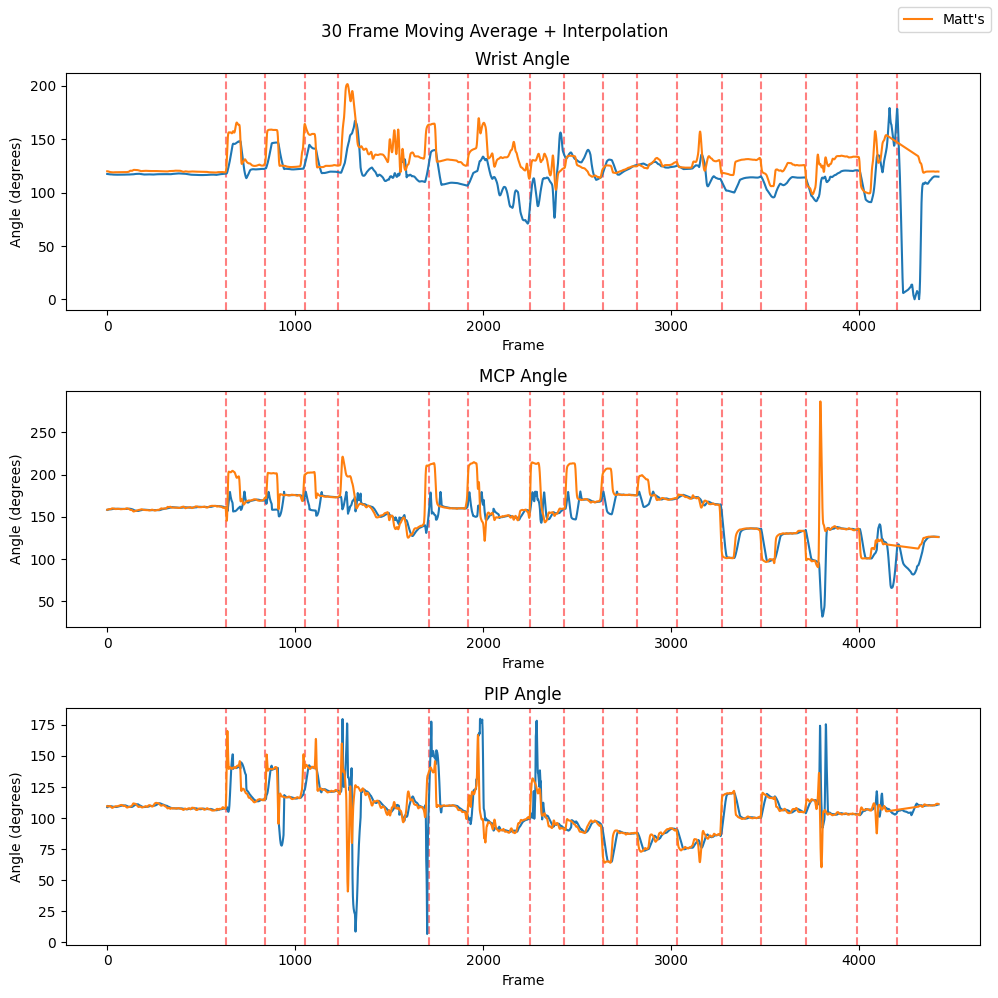

In [ ]:
#Plotting Angles over Time
fig, axs = plt.subplots(3,1, figsize=(10,10))

for time in scaledStimTimes:
    axs[0].axvline(x=time,color='r', ls = '--' , alpha=0.5)
    axs[1].axvline(x=time, ls = '--',color='r', alpha=0.5)
    axs[2].axvline(x=time, ls = '--' ,color='r',alpha=0.5)


axs[0].plot(wristAngle)
axs[0].plot(wa[0], label="Matt's")
axs[0].set_title("Wrist Angle")
axs[0].set_xlabel("Frame")
axs[0].set_ylabel("Angle (degrees)")

axs[1].plot(mcpAngle)
axs[1].plot(ma[0])
axs[1].set_title("MCP Angle")
axs[1].set_xlabel("Frame")
axs[1].set_ylabel("Angle (degrees)")

axs[2].plot(pipAngle)
axs[2].plot(pa[0])
axs[2].set_title("PIP Angle")
axs[2].set_xlabel("Frame")
axs[2].set_ylabel("Angle (degrees)")
fig.suptitle("30 Frame Moving Average + Interpolation")
fig.legend()
plt.tight_layout()
plt.show()



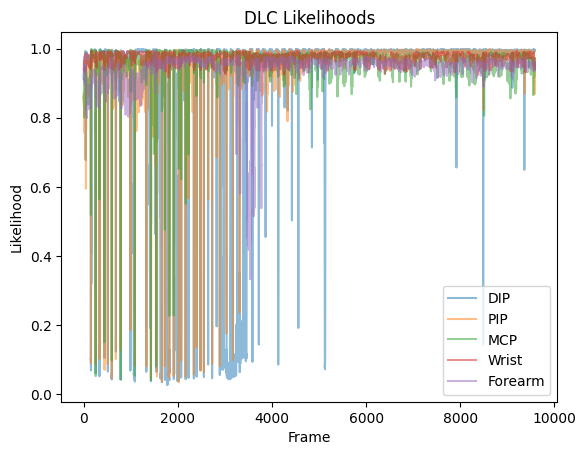

In [ ]:
plt.plot(data.iloc[:][data.columns[3]], label = 'DIP', alpha = 0.5)
plt.plot(data.iloc[:][data.columns[6]], label = 'PIP', alpha = 0.5)
plt.plot(data.iloc[:][data.columns[9]], label = 'MCP', alpha = 0.5)
plt.plot(data.iloc[:][data.columns[12]], label = 'Wrist', alpha = 0.5)
plt.plot(data.iloc[:][data.columns[15]], label = 'Forearm', alpha = 0.5)
plt.title("DLC Likelihoods")
plt.ylabel("Likelihood")
plt.xlabel("Frame")
plt.legend()
plt.show()

In [ ]:
wrist_likelihood = (data.iloc[:][data.columns[9]] + data.iloc[:][data.columns[12]] + data.iloc[:][data.columns[15]])/3
mcp_likelihood = (data.iloc[:][data.columns[12]] + data.iloc[:][data.columns[9]] + data.iloc[:][data.columns[6]])/3
pip_likelihood = (data.iloc[:][data.columns[9]] + data.iloc[:][data.columns[6]] + data.iloc[:][data.columns[3]])/3


# Create a custom colormap from green to red
colors = [(1, 0, 0), (0, 1, 0)]  # Green to Red
n_bins = 100  # Discretizes the interpolation into bins
cmap = LinearSegmentedColormap.from_list("GreenRed", colors, N=n_bins) #use seaborn color palette or matplotlib color palette
cmap = 'plasma'
print(pip_likelihood)

0       0.876012
1       0.872960
2       0.895432
3       0.874541
4       0.877716
          ...   
9581    0.970702
9582    0.958493
9583    0.956337
9584    0.940079
9585    0.965100
Length: 9586, dtype: float64


In [ ]:
wristAngle = []
mcpAngle = []
pipAngle = []
for i in range(len(data)):  #save angle for each posture for all frames
    forearm = (data.iloc[i][data.columns[13]], data.iloc[i][data.columns[14]])
    wrist = (data.iloc[i][data.columns[10]], data.iloc[i][data.columns[11]])
    mcp = (data.iloc[i][data.columns[7]], data.iloc[i][data.columns[8]])
    pip = (data.iloc[i][data.columns[4]], data.iloc[i][data.columns[5]])
    dip = (data.iloc[i][data.columns[1]], data.iloc[i][data.columns[2]])
    wristAngle.append(calculate_angle(forearm, wrist, mcp))
    mcpAngle.append(calculate_angle(wrist, mcp, pip))
    pipAngle.append(calculate_angle(mcp, pip, dip))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


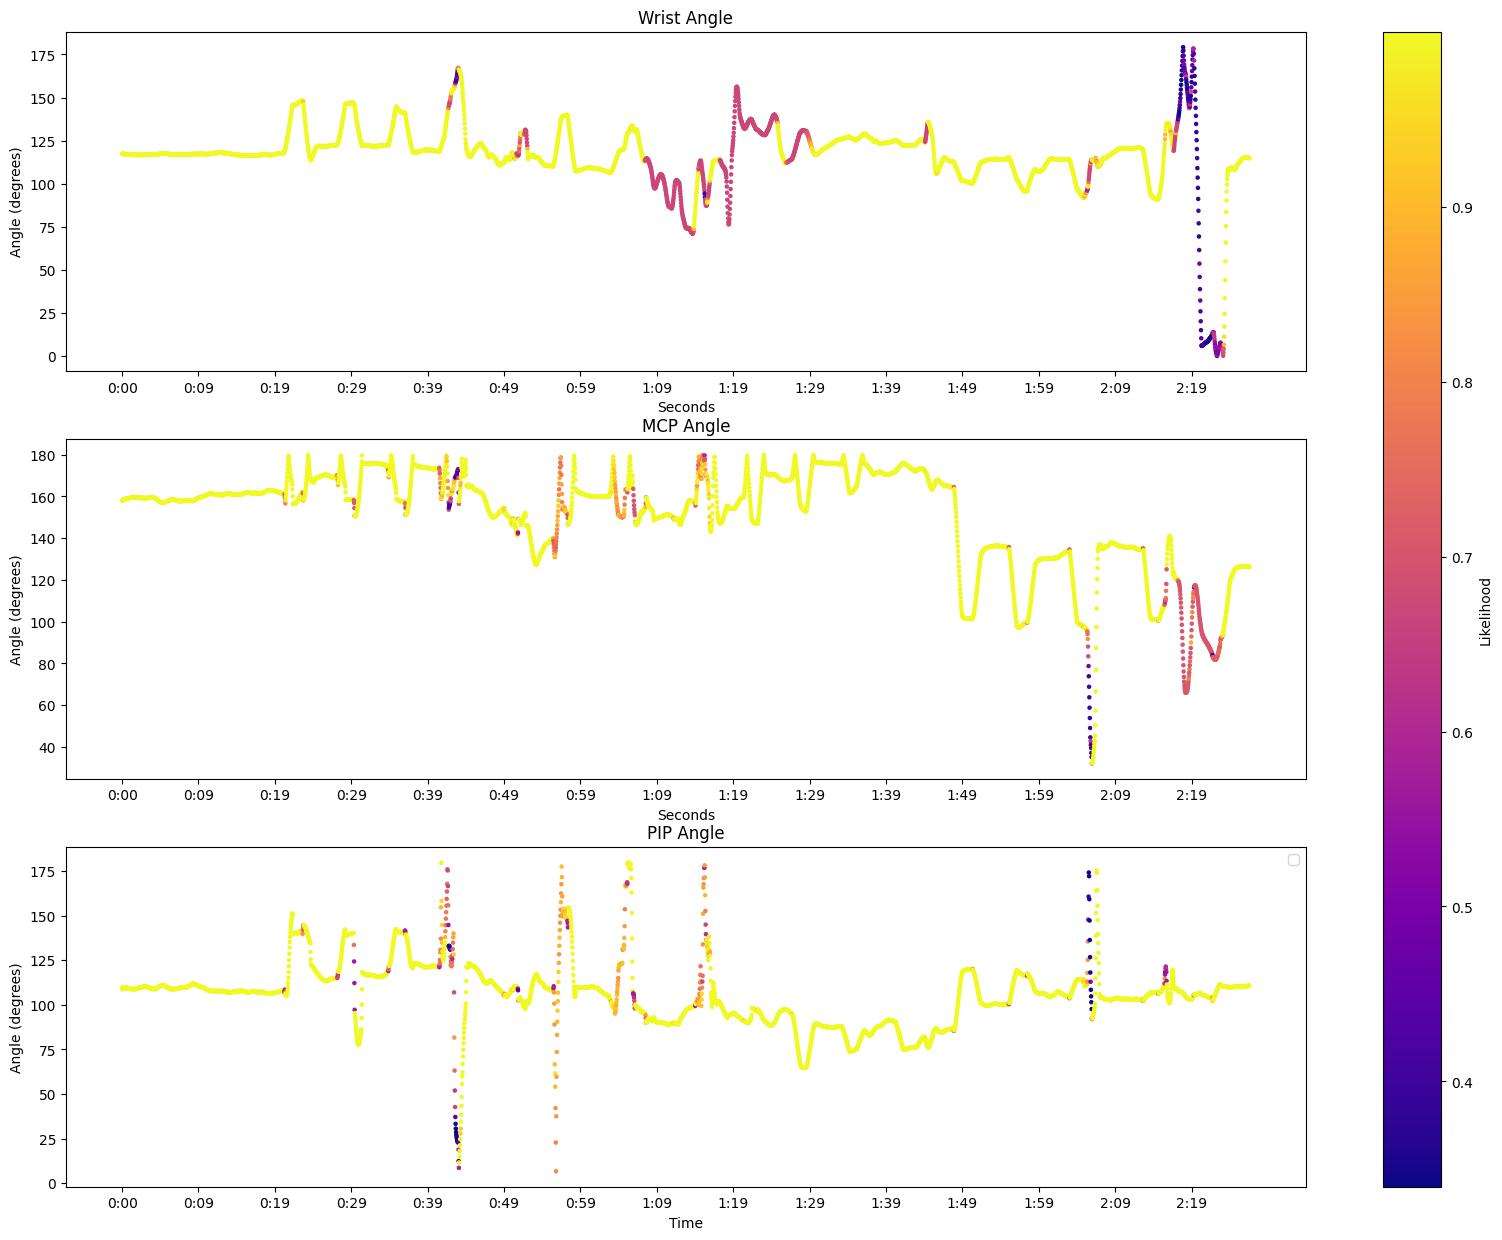

In [ ]:
#Plotting Angles over Time

# Time array (in seconds)
time = np.arange(len(wristAngle)) / 30
# Convert time to minutes:seconds format
time_labels = [f'{int(t // 60)}:{int(t % 60):02d}' for t in time]

slice_interval = 10# seconds
slicing_indices = np.arange(0, len(time), slice_interval * fps).astype(int)

fig, axs = plt.subplots(3,1, figsize=(20,15))

scatter1 = axs[0].scatter(time,wristAngle, c = wrist_likelihood,cmap = cmap,s=5)
axs[0].set_title("Wrist Angle")
axs[0].set_xlabel("Seconds")
axs[0].set_ylabel("Angle (degrees)")
axs[0].set_xticks(time[slicing_indices], [time_labels[i] for i in slicing_indices])
# plt.colorbar()


axs[1].scatter(time,mcpAngle, c = mcp_likelihood,cmap = cmap,s=5)
axs[1].set_title("MCP Angle")
axs[1].set_xlabel("Seconds")
axs[1].set_ylabel("Angle (degrees)")
axs[1].set_xticks(time[slicing_indices], [time_labels[i] for i in slicing_indices])


axs[2].scatter(time,pipAngle, c = pip_likelihood,cmap = cmap,s=5)
axs[2].set_title("PIP Angle")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Angle (degrees)")
axs[2].set_xticks(time[slicing_indices], [time_labels[i] for i in slicing_indices])
# axs[2].fill_between(time, min(pipAngle), max(pipAngle), where=(time >= 110) & (time <= 140), color='grey', alpha=0.3, label='Camera Shift')
plt.legend()
cbar = fig.colorbar(scatter1, ax=axs)
cbar.set_label('Likelihood')
# fig.suptitle("Muscle Fatigue Test")
# plt.tight_layout()

plt.show()

In [ ]:
# Taking a 1 second window around each stim command (30 fps)
wristStim = [np.mean(wristAngle[max(i-15, 0):min(i+15, len(wristAngle))]) for i in useFramesMove]
mcpStim = [np.mean(mcpAngle[max(i-15, 0):min(i+15, len(mcpAngle))]) for i in useFramesMove]
pipStim = [np.mean(pipAngle[max(i-15, 0):min(i+15, len(pipAngle))]) for i in useFramesMove]


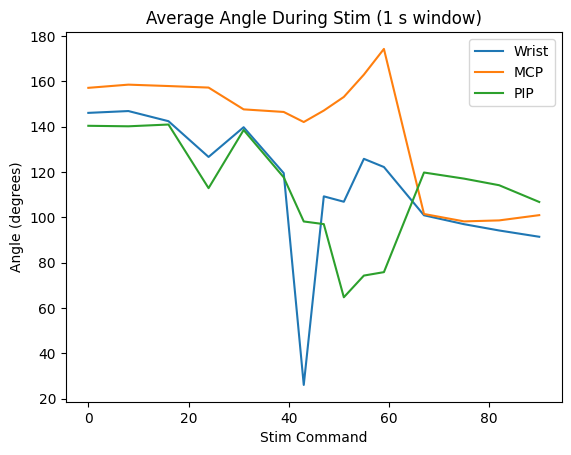

In [ ]:
plt.plot(stimCmds, wristStim, label="Wrist")
plt.plot(stimCmds, mcpStim, label="MCP")
plt.plot(stimCmds, pipStim, label="PIP")
plt.legend()
plt.xlabel("Stim Command")
plt.ylabel("Angle (degrees)")
plt.title("Average Angle During Stim (1 s window)")
plt.show()

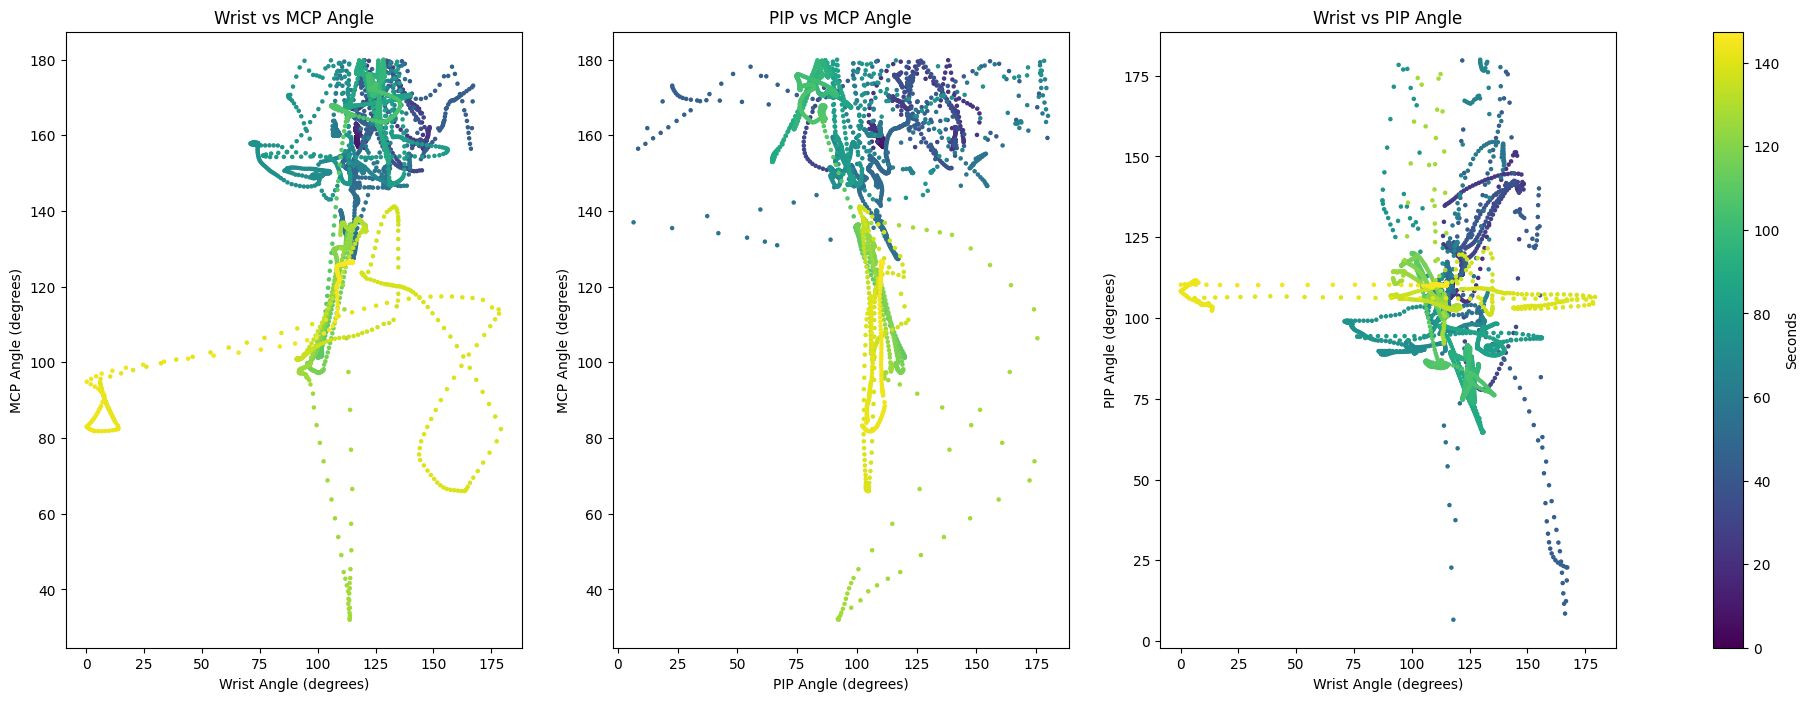

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(25,8))

scatter1 = axs[0].scatter(wristAngle,mcpAngle, c =np.arange(len(wristAngle)) / 30, cmap = 'viridis',s=5 )
axs[0].set_title("Wrist vs MCP Angle")
axs[0].set_xlabel("Wrist Angle (degrees)")
axs[0].set_ylabel("MCP Angle (degrees)")

axs[1].scatter(pipAngle,mcpAngle, c =np.arange(len(wristAngle)) / 30, cmap = 'viridis',s=5 )
axs[1].set_title("PIP vs MCP Angle")
axs[1].set_xlabel("PIP Angle (degrees)")
axs[1].set_ylabel("MCP Angle (degrees)")

axs[2].scatter(wristAngle,pipAngle, c =np.arange(len(wristAngle)) / 30, cmap = 'viridis',s=5 )
axs[2].set_title("Wrist vs PIP Angle")
axs[2].set_xlabel("Wrist Angle (degrees)")
axs[2].set_ylabel("PIP Angle (degrees)")

cbar = fig.colorbar(scatter1, ax=axs)
cbar.set_label('Seconds')

plt.show()

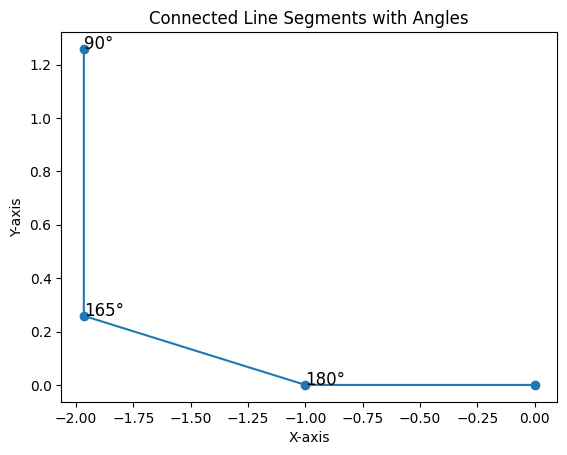

In [9]:
# trying to plot angles on a skeleton

angles_degrees = [180, 165, 90]
angles_radians = [np.radians(x) for x in angles_degrees]
x=[0]
y=[0]

for angle in angles_radians:
    x.append(x[-1] + np.cos(angle))
    y.append(y[-1] + np.sin(angle))

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the line segments
ax.plot(x, y, marker='o')

# Add labels to the angles
for i, angle in enumerate(angles_degrees):
    ax.text(x[i+1], y[i+1], f'{angle}°', fontsize=12)

# Add titles and labels
ax.set_title('Connected Line Segments with Angles')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Show the plot
plt.show()


# To do
- Figure out how to remove noisy movement from data
  - Interpolation or sliding average?
- Make a command curve for each electrode (across pulse width or amp? constant freq)
- Account for low likelihoods from DLC